In [2]:
# First my program will install all the required libraries and will read the csv file and will convert it to dataframe df.
# It will give column names to the datafram df and then it will drop some columns except text and sentiment.
# It will count the tweets group by sentiment.
# It will add new column pre_clean_len to dataframe which is length of each tweet.
# plot pre_clean_len column.
# check for any tweets greater than 140 characters.
# for each text i am calling tweet_cleaner function which will remove convert words to lower case, remove URL, remove hashtag, remove @mentions, HTML decoding, UTF-8 BOM decoding and converting words like isn't to is not.
# And all this it will store in list called clean_tweet_texts.
# Again it will tokenize the tweets in clean_tweet_texts and will do lemmatizing for every word in  list and after lemmatization it will join all the wirds again and will store it in new list called clean_df1.
# This clean_df1 is then converted to dataframe and a sentiment column is added to it which is from old dataframe df.
# Again it will add new column pre_clean_len to dataframe which is length of each tweet.
# Again check for any tweets greater than 140 characters.
# All the tweets is given to new variable x.
# All the tweets sentiments is given to new variable y and plot the see shaoe of both x and y variable.
# Now split the dataset in ratio 80:20 whereas 80% is for training and 20% is for testing.
# Split both the x and y variables.
# make a new instance vect of Tf-idf vectorizer and pass parameter as analyzer = "word" and ngrams_range = (1,1).
# this ngrams_range is for feature selection is given (1,1) it will only select unigrams, (2,2) only bigrams, (3,3) only trigrams, (1,2) unigrams and bigrams, (1,3) unigrams, bigrams and trigrams.
# we can also remove stop words over here by simply add new parameter stop_words = 'english'.
# fit or traing data tweets to vect.
# transform our training data tweets.
# transform our testing data tweets.
# import naive bayes and make object of it. Fit our traing tweets data and training tweets sentiment to the model.
# do 10- fold cross validation on the training data and  calculate the mean accuracy of it.
# predict the sentiments of testing tweets data.
# calculate the accuracy of predicted sentiments with the original tweets sentiment of testing data.
# plot the confusion matrix between original testing sentiment data and predicted sentiment.
# import logistic regression and make object of it. Fit our traing tweets data and training tweets sentiment to the model.
# do 10- fold cross validation on the training data and  calculate the mean accuracy of it.
# predict the sentiments of testing tweets data.
# calculate the accuracy of predicted sentiments with the original tweets sentiment of testing data.
# plot the confusion matrix between original testing sentiment data and predicted sentiment.
# import SVM and make object of it. Fit our traing tweets data and training tweets sentiment to the model.
# do 10- fold cross validation on the training data and  calculate the mean accuracy of it.
# predict the sentiments of testing tweets data.
# calculate the accuracy of predicted sentiments with the original tweets sentiment of testing data.
# plot the confusion matrix between original testing sentiment data and predicted sentiment.

In [3]:
import pandas as pd #import pandas
import numpy as numpy #import numpy
from sklearn.utils import shuffle # to shuffle the data
import random # import random
import sklearn # import sklearn
import nltk # import nltk
from nltk.corpus import stopwords #import stop words
import re # import regular expression
from nltk.tokenize import word_tokenize # import word_tokenize
import matplotlib
import matplotlib.pyplot as plt #import matplotlib.pyplot
df = pd.read_csv("/content/drive/MyDrive/ml decemeber 4th/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None) #read csv file without header as dataframe
from sklearn.feature_extraction.text import TfidfVectorizer #  import TF-idf vectorizer
df = shuffle(df) # shuffle csv file
#tweets1 = df.iloc[0:9999,]
#tweets1.to_csv('tweets1.csv', sep=',')
%matplotlib inline
#data
print(sklearn.__version__)
print(matplotlib.__version__)
print(numpy.__version__)
print(pd.__version__)
print(nltk.__version__)

1.2.2
3.7.1
1.23.5
1.5.3
3.8.1


In [4]:
df.columns = ["sentiment", "id", "date", "query", "user", "text"] # give column names
#data

In [5]:
df = df.drop(["id", "date", "query", "user"], axis = 1) #drop some column from the dataframe
#data

In [6]:
df.head() # get the first 5 rows from the dataframe

,sentiment,text
484679,0,"@DJMoReX Yeah, Im just jealous really. @xxlea ..."
445377,0,I lost my lotto ticket. I bet this was the one...
763853,0,Jon &amp; Kate done after all them damn kids a...
422692,0,@Angelayang hahahah my laura is my best friend...
1010545,4,"I need to go now. Rest the pc, my fingers, my ..."


In [7]:
df.sentiment.value_counts() # count the number of sentiments with respect to their tweet(4 stands for positive tweet and 0 stands for negative tweet)

0    800000
4    800000
Name: sentiment, dtype: int64

In [8]:
df['pre_clean_len'] = [len(t) for t in df.text] # add new column pre_clean_len to dataframe which is length of each tweet

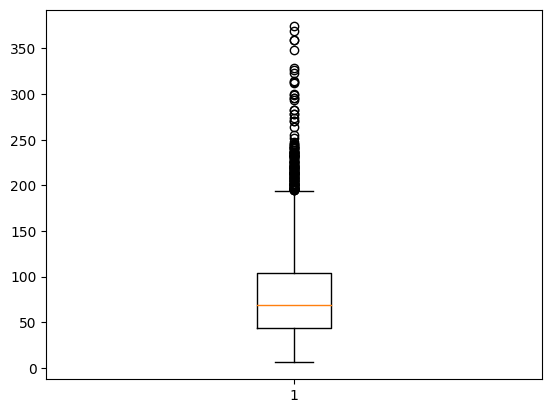

In [9]:
plt.boxplot(df.pre_clean_len) # plot pre_clean_len column
plt.show()

In [10]:
df[df.pre_clean_len > 140].head(10)  # check for any tweets greater than 140 characters

,sentiment,text,pre_clean_len
763853,0,Jon &amp; Kate done after all them damn kids a...,149
33640,0,If anybody remembers how Eddie embarrassed Dav...,148
1499931,4,thanks for the great tunes and prop/rb's repli...,149
570819,0,"Had to drop out of the HardRock Cafe plan, was...",142
838307,4,Just spent several hours in the garden putting...,142
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
733633,0,Sleep help hopefully. Took ambien &amp; watchi...,146
1528683,4,Went to the bathroom this morning &amp; was gr...,141
1556990,4,came home &amp; saw package.. in it was @Jonas...,156
1286400,4,It's June! almost time for school! I can't wai...,142


In [11]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions fron tweets
pat2 = r'https?://[^ ]+'        # remove URL's from tweets
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URL's from tweets
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # call beautiful object
    souped = soup.get_text()   # get only text from the tweets
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig codeing
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL's
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting word's like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

In [12]:
nums = [0,400000,800000,1200000,1600000] # used for batch processing tweets
#nums = [0, 9999]
clean_tweet_texts = [] # initialize list
for i in range(nums[0],nums[4]): # batch process 1.6 million tweets
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))  # call tweet_cleaner function and pass parameter as all the tweets to clean the tweets and append cleaned tweets into clean_tweet_texts list

<ipython-input-11-3b6eed6abdc4>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')    # call beautiful object


In [13]:
#clean_tweet_texts

In [14]:
def simple_tokenize(text):
    return text.split()

word_tokens = []
for word in clean_tweet_texts:
    word_tokens.append(simple_tokenize(word))


In [15]:
# word_tokens
# stop = set(stopwords.words('english'))
# clean_df =[]
# for m in word_tokens:
#     a = [w for w in m if not w in stop]
#     clean_df.append(a)

In [16]:
# Lemmatizing

In [17]:
import nltk
nltk.download('wordnet')
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Stemming

In [19]:
# df1 = []
# from nltk.stem import PorterStemmer
# ps = PorterStemmer()
# for l in word_tokens:
#     b = [ps.stem(q) for q in l]
#     df1.append(b)

In [20]:
#df

In [21]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df1.append(a) # append a to clean_df1

In [22]:
#clean_df1

In [23]:
clean_df = pd.DataFrame(clean_df1,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
clean_df['target'] = df.sentiment # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
#clean_df

In [24]:
clean_df['clean_len'] = [len(t) for t in clean_df.text] # Again make a new coloumn in the dataframe and name it as clean_len which will store thw number of words in the tweet

In [25]:
clean_df[clean_df.clean_len > 140].head(10) # agin check id any tweet is more than 140 characters

,text,target,clean_len


In [26]:
X = clean_df.text # get all the text in x variable
y = clean_df.target # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(1600000,)
(1600000,)


In [27]:
from sklearn.model_selection import train_test_split  # Corrected import statement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# X_train is the tweets of training data, X_test is the testing tweets which we have to predict,
# y_train is the sentiments of tweets in the training data and y_test is the sentiments of the tweets
# which we will use to measure the accuracy of the model


In [28]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) # Get Tf-idf object and save it as vect. We can select features from here we just have simply change
                                                                                     #the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [29]:
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train) # transform our training data tweets

In [30]:
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

In [31]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [32]:
nb.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10)

In [33]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.79628515625

In [34]:
y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets

In [35]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) # measure the accuracy of our model on the testing data

0.79735625

In [36]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[138107,  22049],
       [ 42797, 117047]])

In [40]:
from sklearn.linear_model import LogisticRegression # import Logistic Regression model from sklearn.linear_model
logisticRegr = LogisticRegression(C = 1.1, solver='saga', max_iter=1000) # get object of logistic regression model with cost parameter = 1.1

In [38]:
logisticRegr.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the logistic regression model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.1)

In [41]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logisticRegr, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.82189765625

In [43]:
# Fit the logistic regression model with training data
logisticRegr.fit(X_train_dtm, y_train)

# After fitting, make predictions on the test data
y_pred_lg = logisticRegr.predict(X_test_dtm)


In [44]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data

0.824646875

In [45]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_lg) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[133979,  26177],
       [ 29936, 129908]])

In [46]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [47]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(random_state=0)

In [48]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.8238867187500001

In [49]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [50]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_svm)  # measure the accuracy of our model on the testing data

0.82585625

In [51]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_svm)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[134058,  26098],
       [ 29628, 130216]])

**Tweet Lengths Before Cleaning:**
This histogram displays the distribution of the lengths of tweets before any text cleaning has been applied.
The x-axis represents the length of tweets in terms of the number of characters, while the y-axis shows the frequency of tweets with those lengths.
This visualization helps to understand the original length variation in the dataset, which can be indicative of the verbosity or conciseness of tweets. <br>

**Tweet Lengths After Cleaning:**
Similar to the first histogram, this graph shows the distribution of tweet lengths, but after the cleaning process.
Cleaning involves lowercasing the text, removing URLs, @mentions, hashtags, and trimming extra spaces.
The comparison between pre- and post-cleaning lengths can reveal the extent of noise (like URLs and mentions) present in the original tweets.<br>

**Top 20 Most Common Words:**
This bar plot visualizes the 20 most frequently occurring words in the cleaned tweets.
The y-axis lists the words, while the x-axis shows their frequency of occurrence in the dataset.
This graph is crucial for understanding the common vocabulary or themes present in the tweets, which can be particularly useful in sentiment analysis to identify words often associated with positive or negative sentiments.<br>


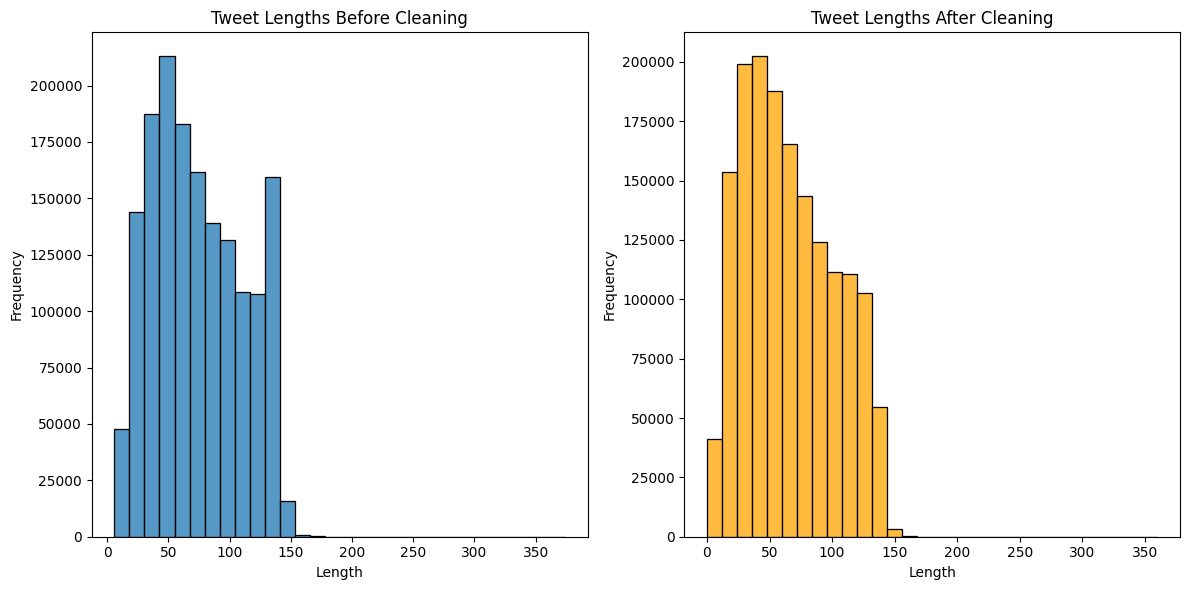

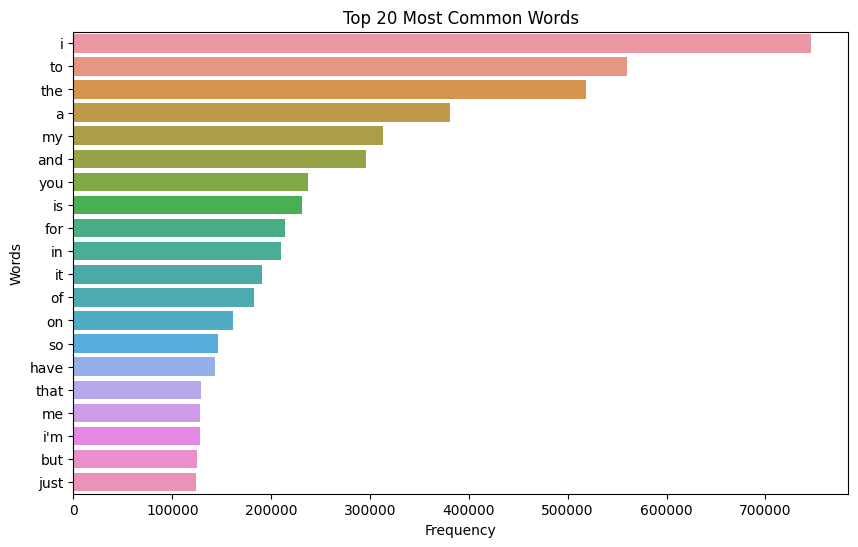

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load the dataset
tweets_df = pd.read_csv("/content/drive/MyDrive/ml decemeber 4th/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None) #read csv file without header as dataframe
tweets_df.columns = ['sentiment', 'id', 'timestamp', 'query', 'user', 'text']

# Drop unnecessary columns
tweets_df_cleaned = tweets_df.drop(['id', 'timestamp', 'query', 'user'], axis=1)

# Add a column for the length of each tweet
tweets_df_cleaned['pre_clean_len'] = tweets_df_cleaned['text'].apply(len)

# Function to clean tweet text
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean the tweets
tweets_df_cleaned['cleaned_text'] = tweets_df_cleaned['text'].apply(clean_tweet)
tweets_df_cleaned['post_clean_len'] = tweets_df_cleaned['cleaned_text'].apply(len)

# Plotting tweet length distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(tweets_df_cleaned['pre_clean_len'], bins=30, kde=False)
plt.title('Tweet Lengths Before Cleaning')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(tweets_df_cleaned['post_clean_len'], bins=30, kde=False, color='orange')
plt.title('Tweet Lengths After Cleaning')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Basic word frequency analysis
all_words = ' '.join(tweets_df_cleaned['cleaned_text']).split()
word_freq = Counter(all_words).most_common(20)

# Visualizing the most common words
words, counts = zip(*word_freq)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()